In [1]:
import gc   #garbage collector-to free memory
gc.enable() #Activate
import zipfile #to unzip files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import wordcloud

In [2]:
!pip install --upgrade kaggle
from google.colab import files
from datetime import datetime
api_token=files.upload()

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.10)


Saving kaggle.json to kaggle.json


In [3]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c instacart-market-basket-analysis

  0% 0.00/795k [00:00<?, ?B/s]
100% 795k/795k [00:00<00:00, 53.6MB/s]
 58% 18.0M/31.3M [00:00<00:00, 58.3MB/s]
100% 31.3M/31.3M [00:00<00:00, 124MB/s] 
  0% 0.00/220k [00:00<?, ?B/s]
100% 220k/220k [00:00<00:00, 73.0MB/s]
  0% 0.00/804 [00:00<?, ?B/s]
100% 804/804 [00:00<00:00, 751kB/s]
  0% 0.00/1.87k [00:00<?, ?B/s]
100% 1.87k/1.87k [00:00<00:00, 1.94MB/s]
 72% 5.00M/6.90M [00:00<00:00, 48.3MB/s]
100% 6.90M/6.90M [00:00<00:00, 44.0MB/s]
 85% 134M/157M [00:01<00:00, 108MB/s] 
100% 157M/157M [00:01<00:00, 130MB/s]


**Data Extraction and preprocessing**

UNZIPPING .csv FILES AND LOADING INTO PANDAS DATAFRAME

In [5]:
with zipfile.ZipFile('/content/aisles.csv.zip','r')as z:
  z.extractall('.')

In [6]:
aisles=pd.read_csv('./aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


*   it is clearly visible that we have 134 aisles ,with id:[0-133] 
*  and there is no null value in dataframe. 
*   Here, aisle_id is the primary key.

In [7]:
with zipfile.ZipFile('/content/departments.csv.zip','r')as z:
    z.extractall('.')

In [8]:
depts=pd.read_csv('./departments.csv')
depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
depts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


*  it can be seen that there are 21 departments with each has a unique id-department_id range from 0 to 21.
*  And there is no null value in dataframe.
*  Here,dept_id is a primary key.

In [9]:
with zipfile.ZipFile('/content/products.csv.zip','r')as z:
    z.extractall('.')

In [10]:
products=pd.read_csv('./products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


*  Hence there are 49688 unique products charagorised using unique product_id:[0,49687] .
* There is no null value. 
* Here,product_id is primary key.  
* And, aisle_id and department_id is a composite key.





In [11]:
with zipfile.ZipFile('/content/order_products__prior.csv.zip','r')as z:
    z.extractall('.')

In [12]:
prior_orders=pd.read_csv('./order_products__prior.csv')
prior_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
prior_orders.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           32434489 non-null  int64
 1   product_id         32434489 non-null  int64
 2   add_to_cart_order  32434489 non-null  int64
 3   reordered          32434489 non-null  int64
dtypes: int64(4)
memory usage: 989.8 MB



*   So we have 32434489 previously placed orders categorised by a unique order_id.

* There is no null value in the dataframe.  


*   Moreover, order_id and product_id are composite keys.





In [13]:
with zipfile.ZipFile('/content/order_products__train.csv.zip','r')as z:
    z.extractall('.')

In [14]:
train_orders=pd.read_csv('./order_products__train.csv')
train_orders.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
train_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB



*   There are 1384617 orders categorised by a unique order_id.
*   There is no null value and order_id ,product_id are composuite keys.


In [15]:
with zipfile.ZipFile('/content/orders.csv.zip','r')as z:
    z.extractall('.')

In [16]:
orders=pd.read_csv('./orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                3421083 non-null  int64  
 1   user_id                 3421083 non-null  int64  
 2   eval_set                3421083 non-null  object 
 3   order_number            3421083 non-null  int64  
 4   order_dow               3421083 non-null  int64  
 5   order_hour_of_day       3421083 non-null  int64  
 6   days_since_prior_order  3214874 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)



* Hence, there are total 3421083 orders(each with a unique order_id ranges from 0-3421082)) that incldues three categories-train, test and prior orders(categorised using eval_set) .
* Here order_id,user_id are primary keys. 
*  And this dataframe has null values in column days_since_prior_order.



*  Moreover we have reordered or not info for prior and train orders(in prior_orders and train_orders dataframes) and no such info for test orders.


Since these 'NAN' values in column days_since_prior_order is to indicate that there is no or zero days since last order placed by this user.So i am **replacing 'NAN' with 0.**

In [ ]:
import numpy as np
orders['days_since_prior_order'].replace(to_replace=np.nan,value=0,inplace=True)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
orders[orders.user_id==2]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
11,2168274,2,prior,1,2,11,0.0
12,1501582,2,prior,2,5,10,10.0
13,1901567,2,prior,3,1,10,3.0
14,738281,2,prior,4,2,10,8.0
15,1673511,2,prior,5,3,11,8.0
16,1199898,2,prior,6,2,9,13.0
17,3194192,2,prior,7,2,12,14.0
18,788338,2,prior,8,1,15,27.0
19,1718559,2,prior,9,2,9,8.0
20,1447487,2,prior,10,1,11,6.0


a user has orders like his very last placed order belongs to train set and all before that belongs to prior.

**Data Visualization**

*OBJECTIVE*:Which previously placed orders will be reordered in future?








**Basic Analysis**



> orders dataframe



**I. Number of orders placed per user**

Text(0.5, 1.0, 'Number of orders per user')

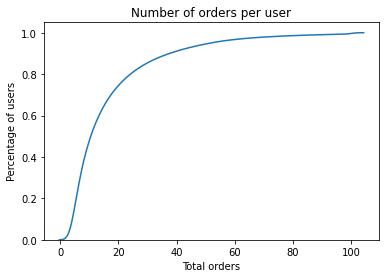

In [ ]:
ord=orders.groupby('user_id')['order_number'].max()
sns.kdeplot(ord.values,cumulative=True)
plt.xlabel('Total orders')
plt.ylabel('Percentage of users')
plt.title('Number of orders per user')

**Obs.-**

*   90% of  users placed <=50 orders
*   Some users 2% placed 70-100 orders



**II. Number of data points per Eval set** 

Text(0, 0.5, 'Number of rows')

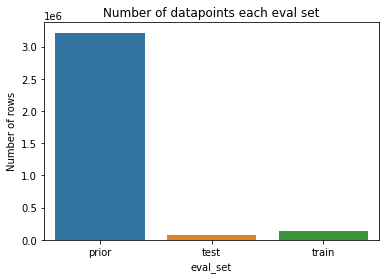

In [61]:
ev=orders.groupby('eval_set')['order_number'].count()
sns.barplot(x=ev.index,y=ev.values)
plt.title('Number of datapoints each eval set')
plt.ylabel('Number of rows')

**Obs.-**

*   We have lots of information about previous/prior ordered products.







> products + aisles + departments


**III. Kinds of aisles each dept with number of products each aisle per dept**

In [ ]:
prds=pd.merge(products,depts,on='department_id',how='right').merge(aisles,on='aisle_id',how='right')

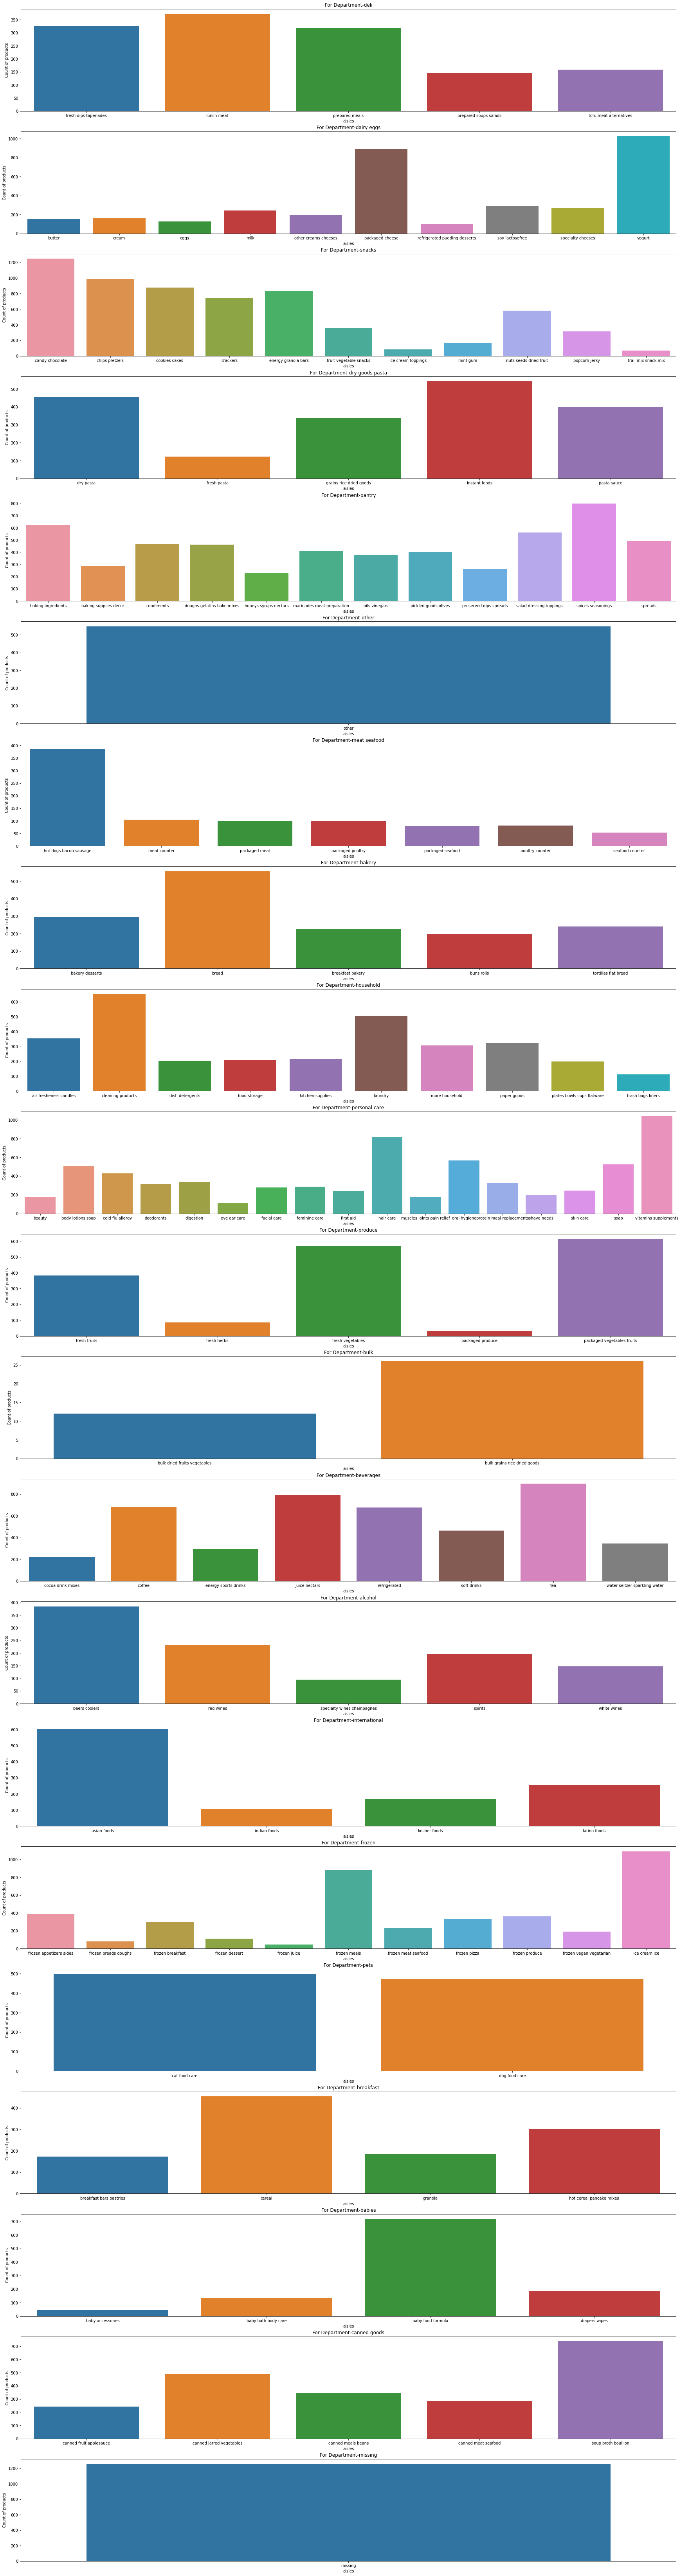

In [ ]:
dept_list=prds.department.unique()
fig=plt.figure(figsize=(30,120))
i=1
for de in dept_list:
  df=prds[prds.department==de]
  df=df[['aisle','product_name']]  # ashles and products in selected dept
  AF=df.groupby('aisle')['product_name'].count().reset_index()  #number of products each aishle in selected dept.
  plt.subplot(21,1,i)
  sns.barplot(x='aisle',y='product_name',data=AF)
  plt.title('For Department-{}'.format(dept_list[i-1]))
  plt.ylabel('Count of products')
  plt.xlabel('aisles')
  i+=1
plt.show()


In order to do analysis on prior orders and train orders data-


1. Merging dataframe prior_orders with products dataframe so to include product_name,aisle id and dept id in final dataframe.



In [17]:
combine_prior=pd.merge(prior_orders,products ,on='product_id').merge(depts,on='department_id',how='left').merge(aisles,on='aisle_id',how='left').merge(orders,on='order_id')
combine_prior.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,fresh vegetables,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,spices seasonings,202279,prior,3,5,9,8.0


2)Merging dataframe to get all info about train orders

In [18]:
combine_train=pd.merge(train_orders,products ,on='product_id').merge(depts,on='department_id',how='left').merge(aisles,on='aisle_id',how='left').merge(orders,on='order_id')
combine_train.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,Bulgarian Yogurt,120,16,dairy eggs,yogurt,112108,train,4,4,10,9.0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,other creams cheeses,112108,train,4,4,10,9.0
2,1,10246,3,0,Organic Celery Hearts,83,4,produce,fresh vegetables,112108,train,4,4,10,9.0


**IV. Number of reorders  in prior and train set**

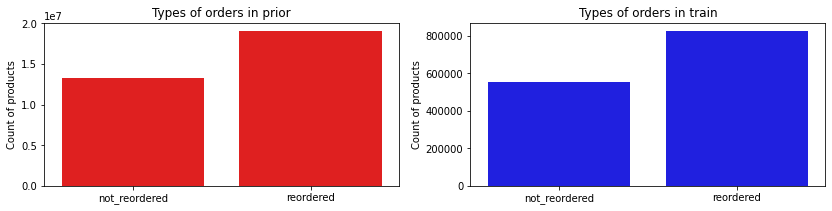

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,3))
labels=['not_reordered','reordered']
sns.barplot(x=combine_prior['reordered'].value_counts().index,y=combine_prior['reordered'].value_counts(),color='red',ax=ax1)
sns.barplot(x=combine_train['reordered'].value_counts().index,y=combine_train['reordered'].value_counts(),color='blue',ax=ax2)
ax1.set_title('Types of orders in prior')
ax1.set_xticklabels(labels)
ax1.set_ylabel('Count of products')
ax2.set_title('Types of orders in train')
ax2.set_xticklabels(labels)
ax2.set_ylabel('Count of products')
plt.xlabel('')
plt.show()



*   Ratio of number of reorders to not reorders is almost same in train and prior.





**prior orders analysis**


> combine_prior dataframe





**V. How many reorders were placed by each user?**

Text(0, 0.5, 'Percentage of users')

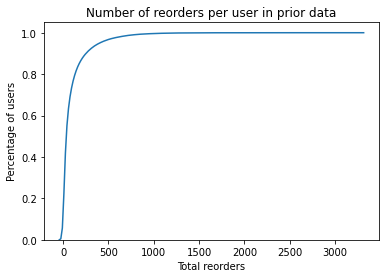

In [ ]:
#number of reorders per user in prior
user_re_prior=combine_prior.groupby(['user_id'])['reordered'].sum().reset_index(name='Total reorders')
sns.kdeplot(x='Total reorders',data=user_re_prior,cumulative=True)  
plt.title('Number of reorders per user in prior data')
plt.xlabel('Total reorders')
plt.ylabel('Percentage of users')

**OBS:** 
*  Number of reorders range from 0-500 for 95% of users.
*   Most users reordered <=50 times around 60%.
*  Few users(60-80%) whom reoredered around 100 times.  




**VI. Which is most reordered product ?**


**VII. What are Top 20 reordered products?**

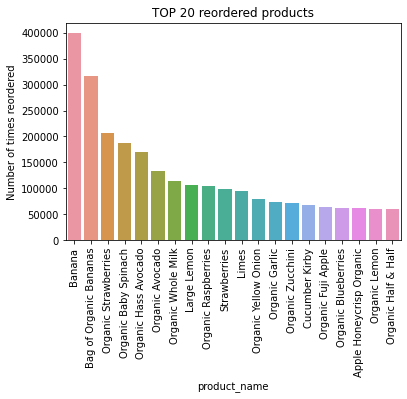

In [ ]:
prd_re_sum=combine_prior.groupby(['product_name'])['reordered'].sum().nlargest(20)
sns.barplot(x=prd_re_sum.index,y=prd_re_sum.values)
plt.xticks(rotation='vertical')
plt.ylabel('Number of times reordered')
plt.title('TOP 20 reordered products')
plt.show()

**OBS-**

*  Bananas is the most reordered product (around 4 lakhs)
*  followed by Bag of organic bananas (around 3 lakhs 20 thousands)


*  The third and fourth most reordered products Organic strawberries and organic baby spinach resp. 
* But these are almost 50% less times reordered than bananas. 







**VIII. Which department had most reordered products?**

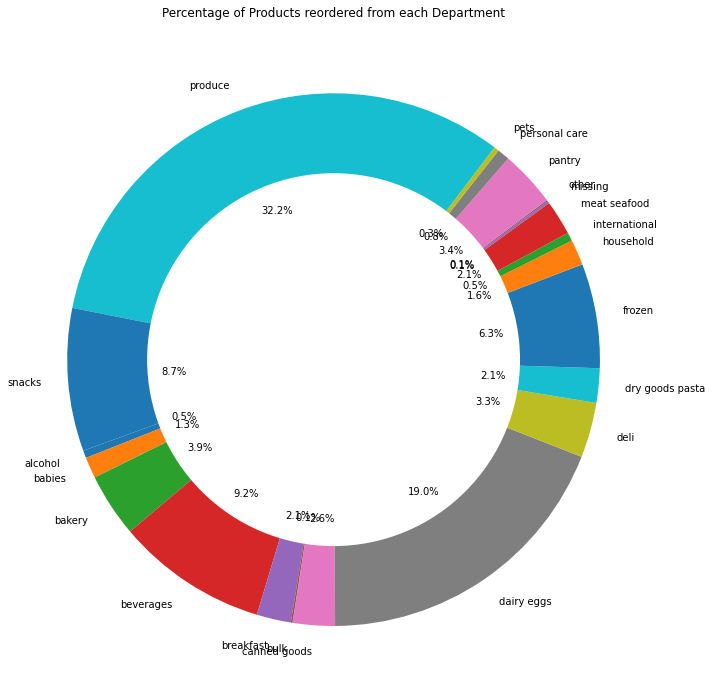

In [ ]:
dept_re_sum=combine_prior.groupby(['department'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(10,10))
labels=dept_re_sum.department.unique()
sizes=(np.array((dept_re_sum['Total reorders']/dept_re_sum['Total reorders'].sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Percentage of Products reordered from each Department')
#draw circle
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
#equal aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()

**Obs-**

* Department from which highest products were reordered is produce(32.2%)

* Dairy eggs comes at second position with 19% reordered products. 
*  Snacks and beverages departments' products were also reordered in significant amount around 9%.


* 'other','missing' and bulk are the departments with least reoredered products =0.1%






**IX. Most Reordered  Product from Each Department**

In [ ]:
product=[]  #highest reordered product per dept
dept=depts.department.unique()  #bame of depts
count=[]  #times of reordered for each in product[]
for de in tqdm(dept):
  val=combine_prior[combine_prior['department']==de]['product_name'].value_counts()
  product.append(val.index[0])
  count.append(val.values[0])

100%|██████████| 21/21 [00:59<00:00,  2.84s/it]


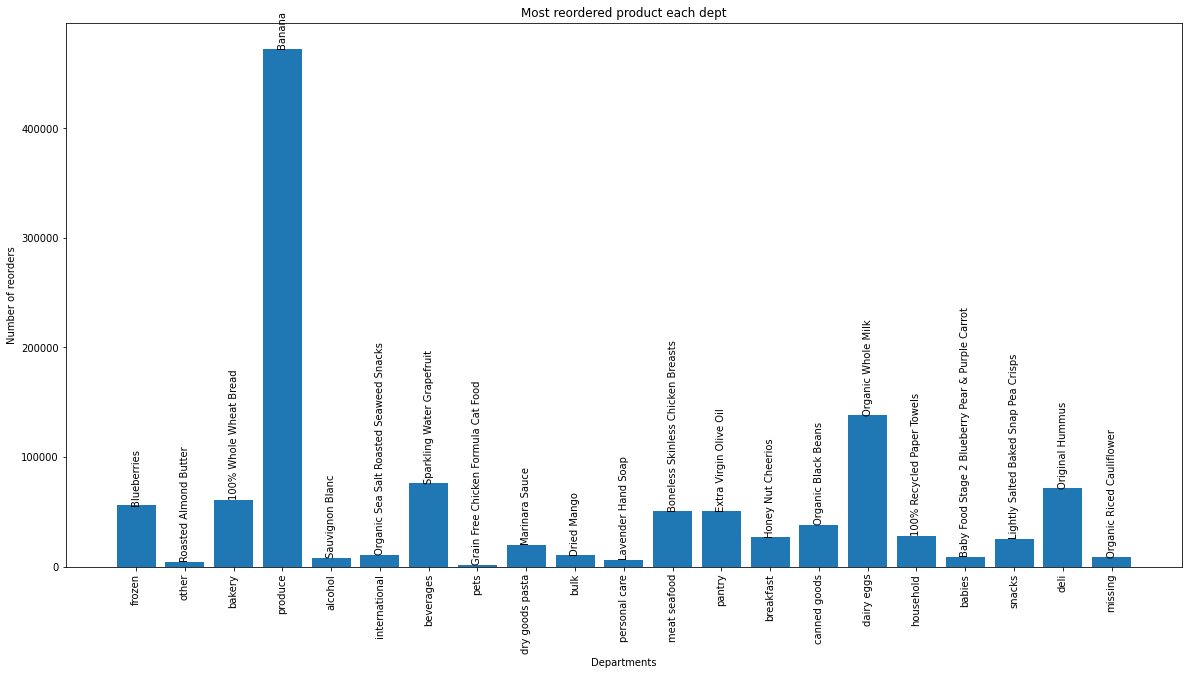

In [ ]:
plt.figure(figsize=(20,10))
bar=plt.bar(dept,count)
i=0
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0,height,product[i],ha='center',va='bottom',rotation=90)
  i+=1
plt.title('Most reordered product each dept')
plt.xlabel('Departments')
plt.xticks(rotation='vertical')
plt.ylabel('Number of reorders')
plt.show()

**OBS-**

*   Banana  is the product that reordered most from produce dept.
*   Followed by Organic whole milk from dairy eggs dept.



**X. Is Banana the only product that contributes to 32% of produce Dept reordering?**


> Top Products were reordered in produce Department(highest reordered dept)



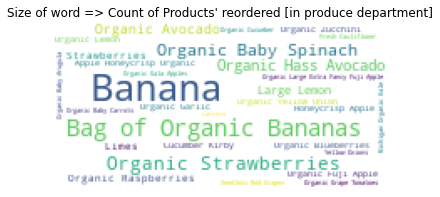

In [ ]:
#dict of products :number of times reordered
dct=combine_prior[(combine_prior['department']=='produce') & (combine_prior['reordered']==1)]['product_name'].value_counts().to_dict()
#wordcloud
cloud=wordcloud.WordCloud(background_color='white',width=200,height=100).generate_from_frequencies(dct)
plt.imshow(cloud)
plt.axis('off')
plt.title('Size of word => Count of Products\' reordered [in produce department]')
plt.show()

**OBS-**

*   No we have many products other than bananas that reordered in amount slightly less than banana.
*   These are Organic products like Bag of organic bananas,Organic strawberries and Organic baby Spinach



**XI. Top Products were reordered in dairy eggs Department(second highest reordered dept)**

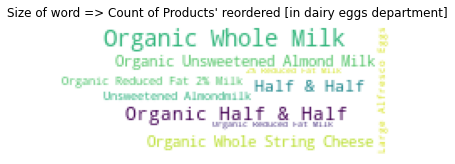

In [ ]:
#dict of products :number of times reordered
dct=combine_prior[(combine_prior['department']=='dairy eggs') & (combine_prior['reordered']==1)]['product_name'].value_counts().to_dict()
#wordcloud
cloud=wordcloud.WordCloud(background_color='white',width=200,height=80).generate_from_frequencies(dct)
plt.imshow(cloud)
plt.axis('off')
plt.title('Size of word => Count of Products\' reordered [in dairy eggs department]')
plt.show()

**OBS-**


*   Organic dairy products like organic whole wheat,Organic whole cheese,Organic half and half and organic almond milk were the most reorder products.




**XII. Which aisle had maximum reordered?**

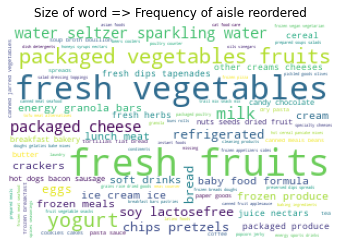

In [ ]:
#dict of aisles :number of times reordered
from wordcloud import wordcloud
dct=combine_prior.groupby('aisle')['reordered'].sum().to_dict()
#wordcloud
cloud=wordcloud.WordCloud(background_color='white',width=300,height=200).generate_from_frequencies(dct)
plt.imshow(cloud)
plt.axis('off')
plt.title('Size of word => Frequency of aisle reordered')
plt.show()

**OBS-**


*   Fresh vegetables and fresh fruits were most reordered.
*   other important reordered aisles are packaged vegetables fruits, yoghurt.



**XIII. Most Reordered  Product from Each aisle**

In [ ]:
product=[]  #highest reordered product per dept
ash=aisles.aisle.unique()  #bame of depts
count=[]  #times of reordered for each in product[]
for de in tqdm(ash):
  val=combine_prior[combine_prior['aisle']==de]['product_name'].value_counts()
  product.append(val.index[0])
  count.append(val.values[0])

100%|██████████| 134/134 [03:58<00:00,  1.78s/it]


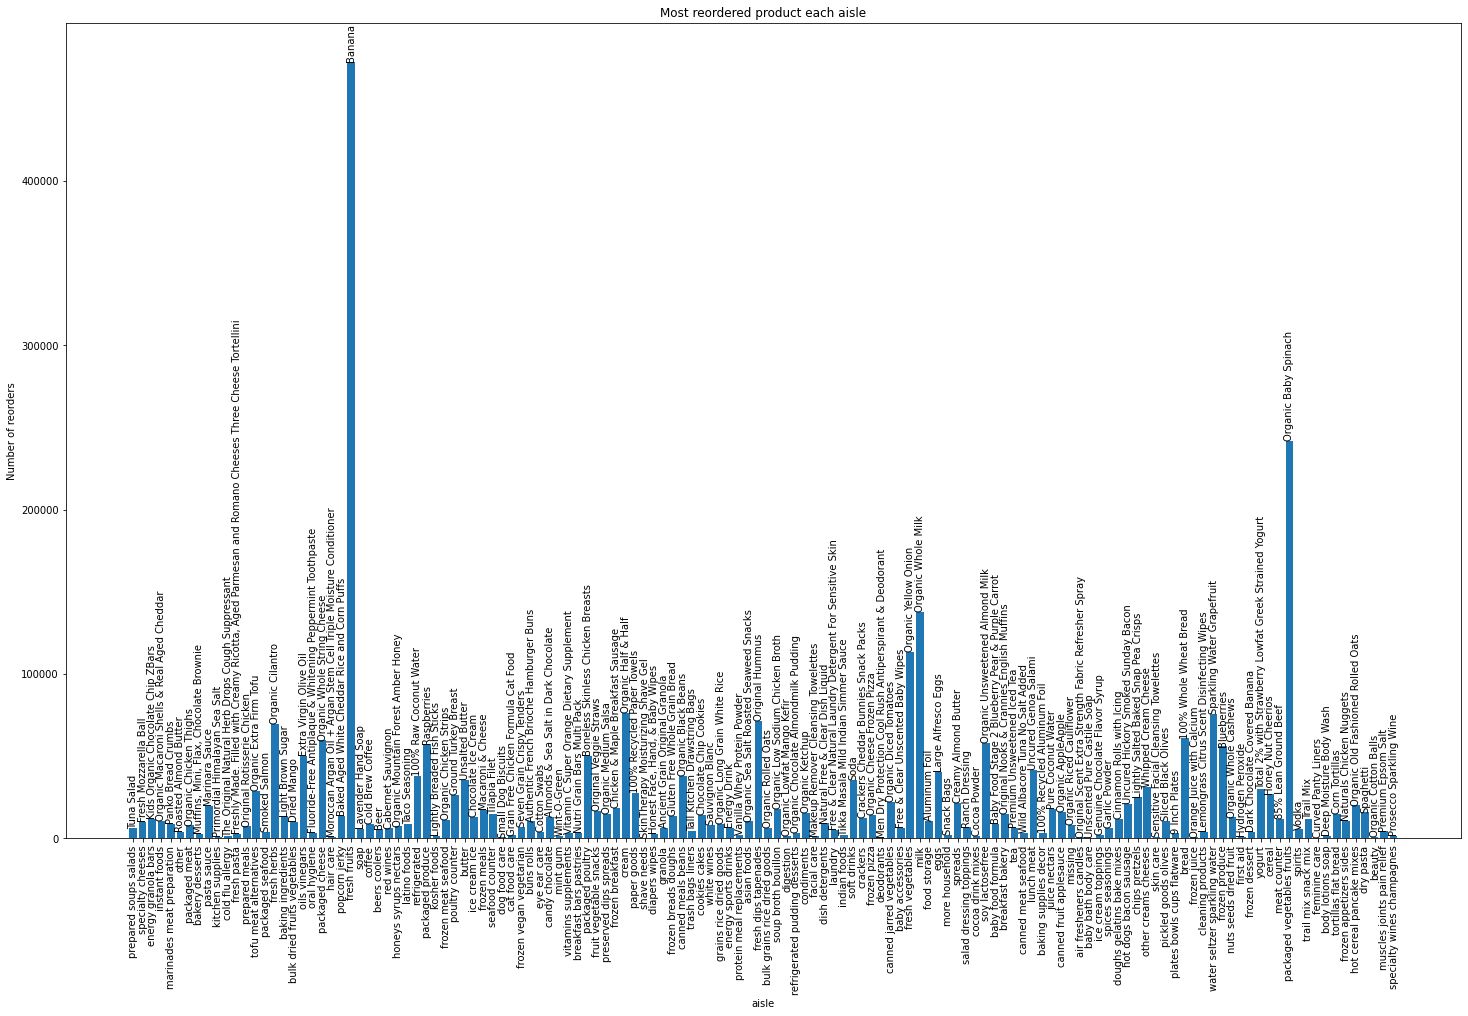

In [ ]:
plt.figure(figsize=(30,15))
bar=plt.bar(ash,count)
i=0
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0,height,product[i],ha='center',va='bottom',rotation=90)
  i+=1
plt.title('Most reordered product each aisle')
plt.xlabel('aisle')
plt.xticks(rotation='vertical')
plt.ylabel('Number of reorders')
plt.show()

**OBS-**


*   Most reordered is Banana from fresh fruits.
*   from packaged fresh vegetable organic baby spinach is most reordered.

*   from milk it is organic whole milk
*   and from fresh vegeatables most reordered was organic yellow onion.





**XIV. What were the most reordered products from most reordered aisles(Fresh fruits,fresh vegetables,packaged vegetables fruits, yoghurt)**

In [ ]:
ash=combine_prior[(combine_prior['aisle']=='fresh fruits')| (combine_prior.aisle=='fresh vegetables') |(combine_prior.aisle=='packaged vegetables fruits') | (combine_prior.aisle=='yoghurt')]
ash=ash.groupby(['aisle','product_name'])['reordered'].sum().reset_index().sort_values(by=['reordered'],ascending=False).head(50)

Text(0, 0.5, 'aisles')

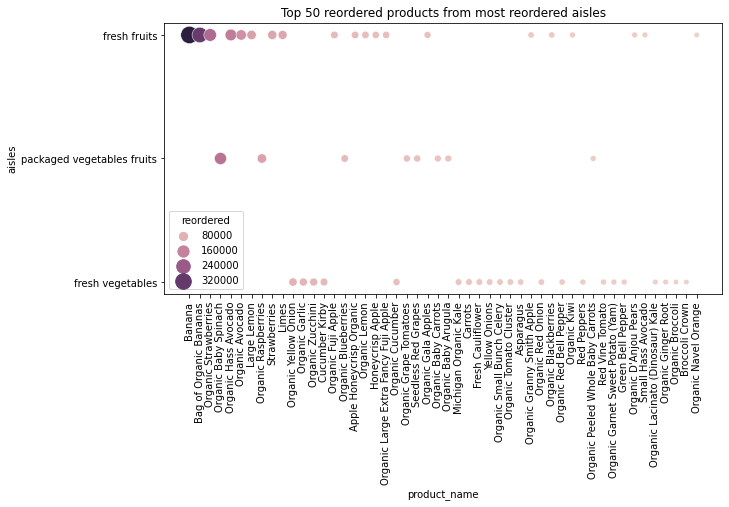

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',size='reordered',y='aisle',data=ash,hue='reordered',sizes=(30,300))

plt.xticks(rotation='vertical')
plt.title('Top 50 reordered products from most reordered aisles')
plt.ylabel('aisles')

**OBS-**


*   Most reordered fresh fruits,Banana and organic fruits. 
*   top 2 most reordered products from are organic baby spinach and organic Rasberries.


*   important fresh vegetables includes organic products like yellow onion, garlic,Zucchini.





**XV. Which day of week had maximum number of reorder placed?**

Text(0.5, 1.0, 'Day wise %ge of reordered placed')

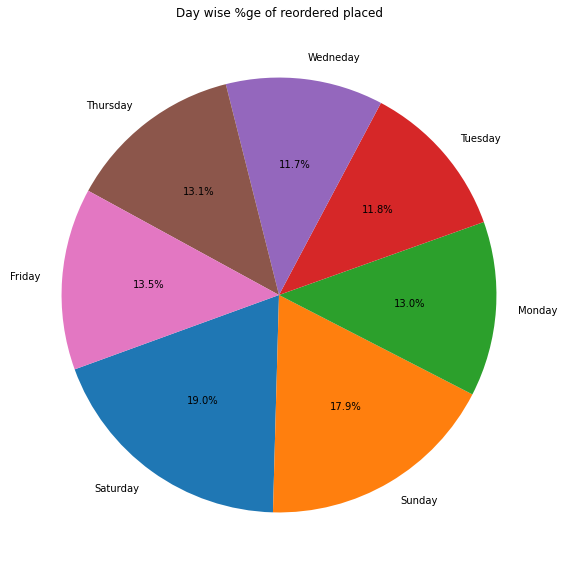

In [ ]:
dow_re_sum=combine_prior.groupby(['order_dow'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(10,10))
labels=['Saturday','Sunday','Monday','Tuesday','Wedneday','Thursday','Friday']
sizes=(np.array((dow_re_sum['Total reorders']/dow_re_sum['Total reorders'].sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Day wise %ge of reordered placed')

**OBS-**

*  Maximum number of reorders placed at Saturday=19%.

* Second day on which most reorder placed was Sunday=17.9%,followed by Friday(13.9%).
*  Monday and Thursday also had number of reorders around 13%.

*  There is no day of week on which number of reorders placed was <11.5%.



**XVI. Products Most Reordered On Weekends**

In [ ]:
filter=combine_prior[(combine_prior['order_dow']==0) | (combine_prior['order_dow']==1)]
filter=filter.groupby(['order_dow','product_name'])['reordered'].sum().reset_index().sort_values(by=['reordered'],ascending=False).head(50)

Text(0, 0.5, 'Number of reorderes')

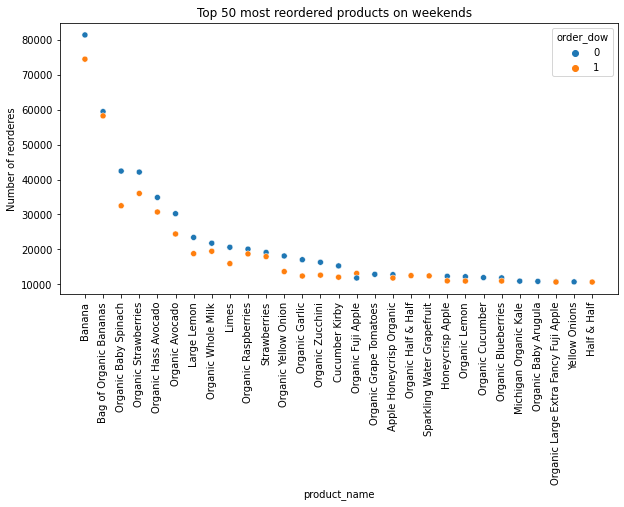

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',y='reordered',data=filter,hue='order_dow')
plt.xticks(rotation='vertical')
plt.title('Top 50 most reordered products on weekends  ')
plt.ylabel('Number of reorderes')

**OBS-**


*   Bananas has approx 5k more reorders on Saturday than on sunday.
*   Organic baby spinach and organic strawberries also has significant more reorders on Saturday than on Sunday.



**XVII. Products Most Reordered On Weekdays**

In [ ]:
filter=combine_prior[(combine_prior['order_dow']>1)]
filter=filter.groupby(['order_dow','product_name'])['reordered'].sum().reset_index().sort_values(by=['reordered'],ascending=False).head(50)

Text(0, 0.5, 'Number of reorders')

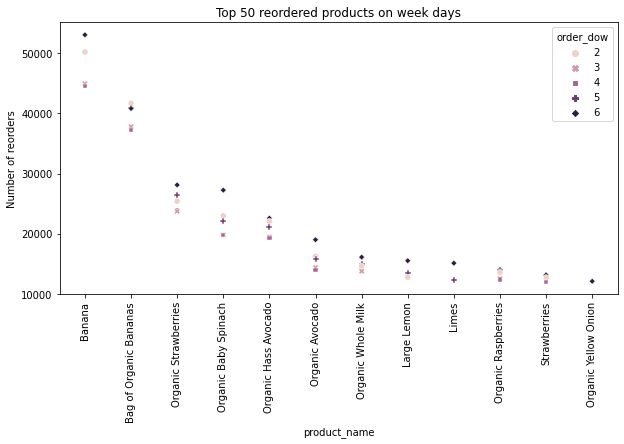

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',y='reordered',data=filter,style='order_dow',hue='order_dow')
plt.xticks(rotation='vertical')
plt.title('Top 50 reordered products on week days')
plt.ylabel('Number of reorders')

**OBS-**


*   Almost all products reordered most on Friday followed by Monday in weekdays
*   Except Limes that reordered on Thursday more than Monday.



**XVIII. products that reordered only on weekends**

In [65]:
filter1=combine_prior[(combine_prior.reordered==1)& (combine_prior['order_dow']<=1)]
filter2=combine_prior[(combine_prior.reordered==1)&(combine_prior['order_dow']>1)]
prd=list(set(filter1['product_name'])-set(filter2['product_name']))  #reordered only on weekends
flt=filter1[filter1['product_name'].isin(prd)].groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered',ascending=False).head(10)

Text(0, 0.5, 'Number of reorders')

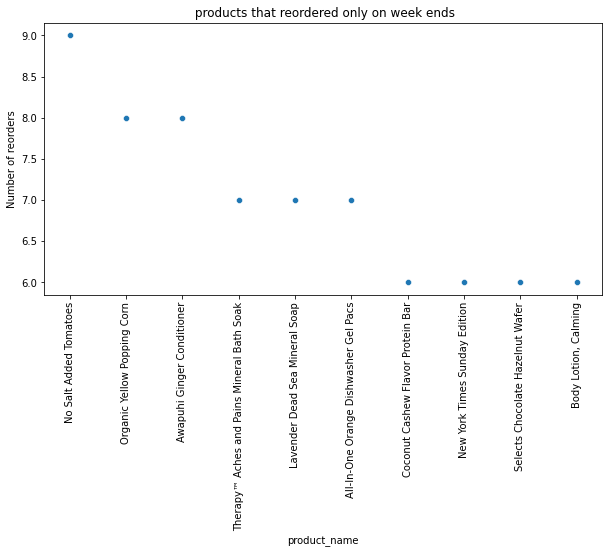

In [66]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',y='reordered',data=flt)
plt.xticks(rotation='vertical')
plt.title(' products that reordered only on week ends')
plt.ylabel('Number of reorders')

**OBS-**


*   We have very few products that reordered only on weekends and amount of reordering is also very low(<=9)






*  Infact there is no product that reorders only on particular day in significant amount(lies <=5)





**XIX. What hour of day had most reordered placed?**

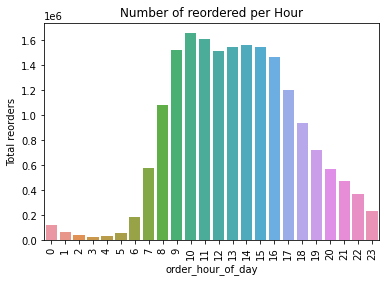

In [ ]:
hour_re_sum=combine_prior.groupby(['order_hour_of_day'])['reordered'].sum().reset_index(name='Total reorders')
sns.barplot(x='order_hour_of_day',y='Total reorders',data=hour_re_sum)
plt.xticks(rotation='vertical')
plt.title('Number of reordered per Hour')
plt.show()

**OBS-**

*  Most reordered placed at 10am

*   9am to 4 pm is the most favorite hours for reordering.
*   least amount of reordered placed at 3am(<0.5%).


*  1am to 5am is the least utilized hours for reordering.












**XX. Which day and which hour of that day is most favorite for reordering products?**

In [ ]:
day_hr_re_sum=combine_prior.groupby(['order_dow','order_hour_of_day'])['reordered'].sum().reset_index()
day_hr_re_sum=day_hr_re_sum.pivot('order_dow','order_hour_of_day','reordered')

Text(0.5, 1.0, 'Number of reorders per hour per day')

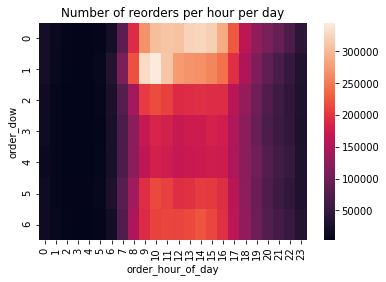

In [ ]:
sns.heatmap(day_hr_re_sum)
plt.title('Number of reorders per hour per day')

**OBS-**

 


*   The most favorite hour for reordering was On Sunday 10 am , followed by 9am.
* Followed by Saturday 12-2pm , most favorite hour to reorder max products.













**XXI. Did products ADD-TO-CART sequence order has any impact on reordering of products?**

Text(0.5, 1.0, 'Add-to-cart order VS Total Number of Reorders')

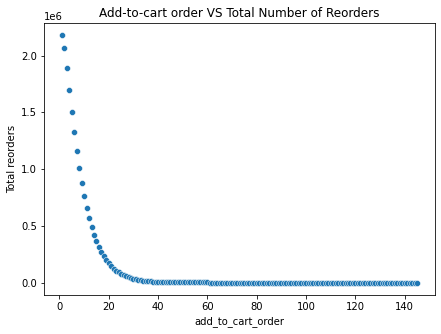

In [ ]:
cart_re_sum=combine_prior.groupby(['add_to_cart_order'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(7,5))
sns.scatterplot(x='add_to_cart_order',y='Total reorders',data=cart_re_sum)
plt.title('Add-to-cart order VS Total Number of Reorders')

**OBS-**


* Maximum reorder happened for products that added at position 1 in cart.
*  Products add to cart order is directly proportional to Total number of reorders.


*   If a product was added after 30 in cart, No reorder will going to happen fo r such products.





**XXII. Did days_since_prior_order has any impact on reordering?**

Text(0.5, 1.0, 'days_since_prior_order VS Total Number of Reorders')

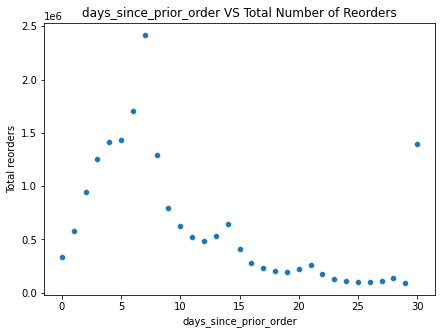

In [ ]:
pr_days_re_sum=combine_prior.groupby(['days_since_prior_order'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(7,5))
sns.scatterplot(x='days_since_prior_order',y='Total reorders',data=pr_days_re_sum)
plt.title('days_since_prior_order VS Total Number of Reorders')

**OBS-**

* orders placed 7 days before has higher chance of reorder.
* most reorder happen after 4- 7 days(inc order).


*   Also after 3, 8 and 30 days almost same amount of reorders done.





**XXIII.  Products reordered after a week**

In [ ]:
filter=combine_prior[combine_prior.days_since_prior_order==7].groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered',ascending=False).head(30)
filter.head()

,product_name,reordered
3086,Banana,53936
2903,Bag of Organic Bananas,39136
27327,Organic Strawberries,24797
24500,Organic Baby Spinach,22920
25837,Organic Hass Avocado,20274


Text(0, 0.5, 'Count of reorders')

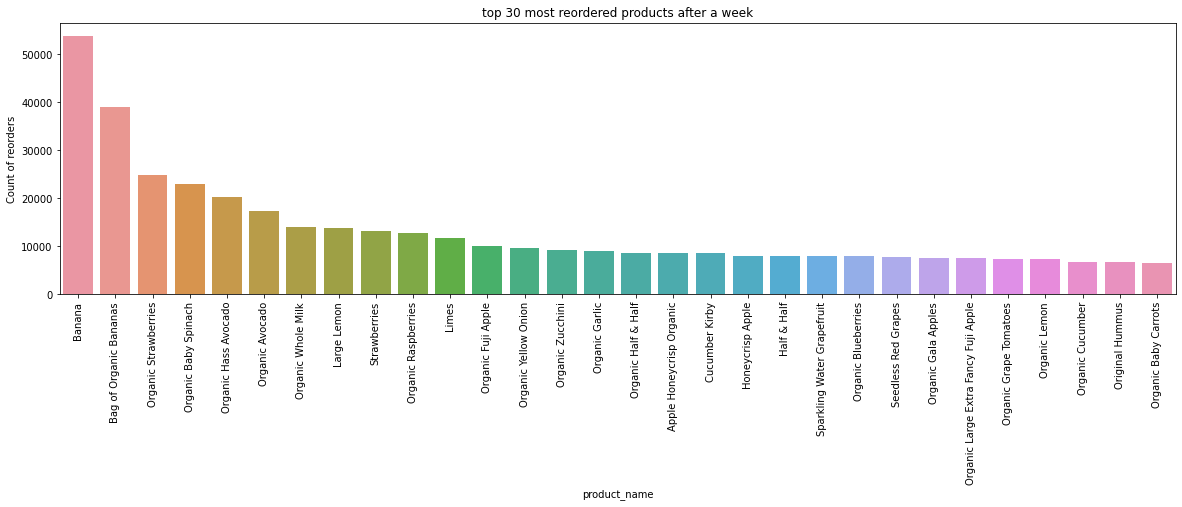

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='product_name',y='reordered',data=filter)
plt.title('top 30 most reordered products after a week')
plt.xticks(rotation='vertical')
plt.ylabel('Count of reorders')

**OBS-**


*   Banana is the product that reordered most after a week, followed by bag of organic bananas and organic strawberries.



**XXIV.  Products reordered after a month**

In [ ]:
filter=combine_prior[combine_prior.days_since_prior_order==30].groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered',ascending=False).head(30)
filter.head()

,product_name,reordered
3184,Banana,32304
2998,Bag of Organic Bananas,19674
25237,Organic Baby Spinach,15414
28083,Organic Strawberries,12403
25203,Organic Avocado,10941


Text(0, 0.5, 'Count of reorders')

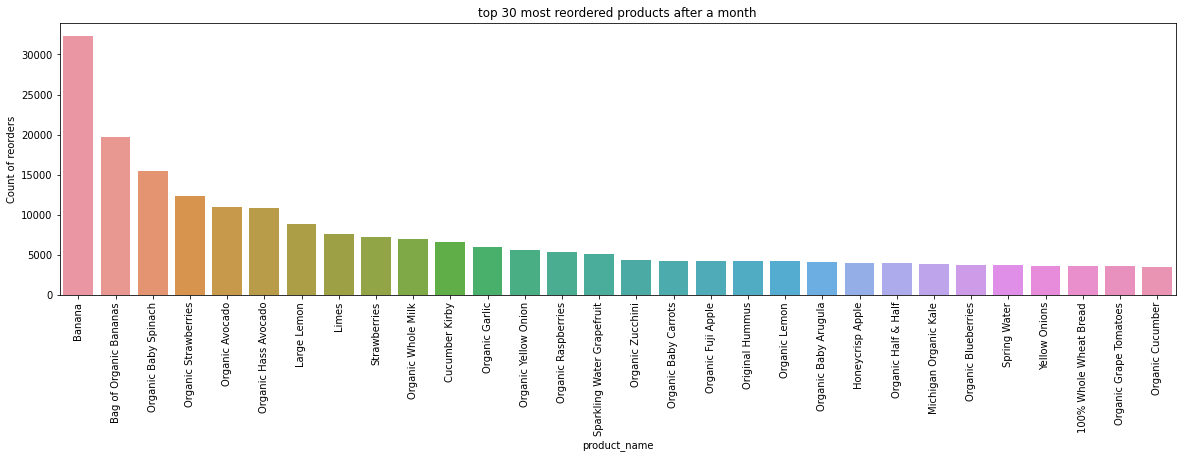

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='product_name',y='reordered',data=filter)
plt.title('top 30 most reordered products after a month')
plt.xticks(rotation='vertical')
plt.ylabel('Count of reorders')

**OBS-**


*   Banana is the product that reordered most after a month, followed by bag of organic bananas and organic baby spinach.



**TRAIN ANALYSIS**

**XXV. How many reorders were placed by each user**

Text(0, 0.5, 'Percentage of users')

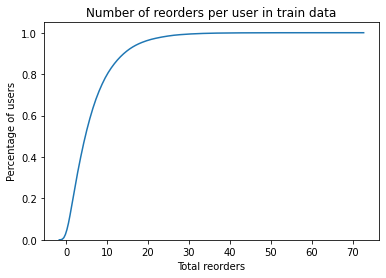

In [ ]:
#number of reorders per user in prior
user_re_prior=combine_train.groupby(['user_id'])['reordered'].sum().reset_index(name='Total reorders')
sns.kdeplot(x='Total reorders',data=user_re_prior,cumulative=True)  
plt.title('Number of reorders per user in train data')
plt.xlabel('Total reorders')
plt.ylabel('Percentage of users')

**OBS-**


*   Most users place <=9 reorders (around 80%)
*   Some users that place upto 30 reorders also



**XXVI)Which is most reordered product ?**


**XXVII) What are Top 20 reordered products?**

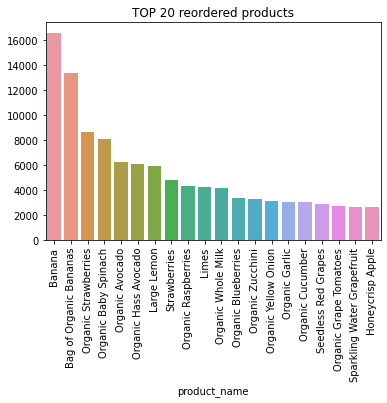

In [ ]:
prd_re_sum=combine_train.groupby(['product_name'])['reordered'].sum().nlargest(20)
sns.barplot(x=prd_re_sum.index,y=prd_re_sum.values)
plt.xticks(rotation='vertical')
plt.title('TOP 20 reordered products')
plt.show()

**OBS-**


*   TOP 20 reordered product in train is same as prior to reordered products.
*   Banana followed by organic products is most reorder products in train also.


> **BANANA is most reorder product followed by organic products**





**XXVIII. Which department had maximum reordered?**

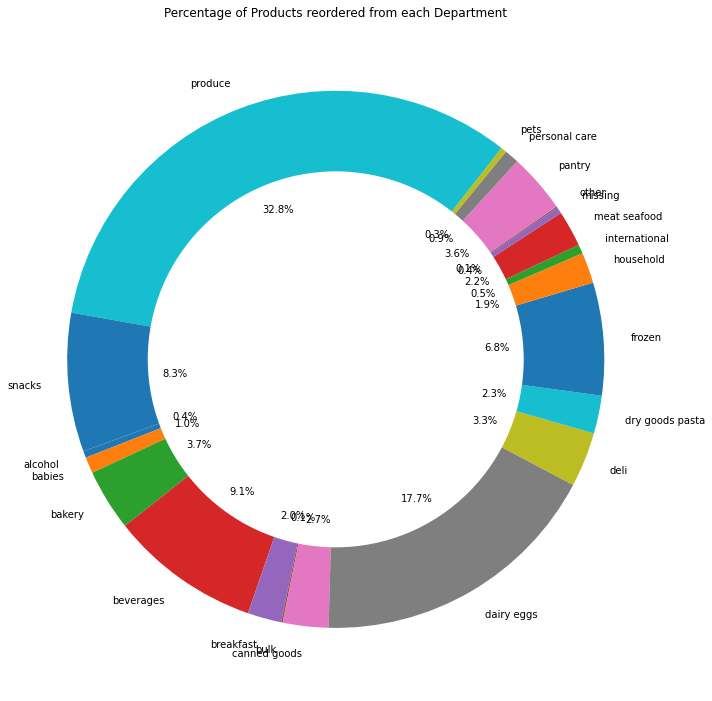

In [ ]:
dept_re_sum=combine_train.groupby(['department'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(10,10))
labels=dept_re_sum.department.unique()
sizes=(np.array((dept_re_sum['Total reorders']/dept_re_sum['Total reorders'].sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Percentage of Products reordered from each Department')
#draw circle
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
#equal aspect ratio
plt.axis('equal')
plt.tight_layout()
plt.show()

**Obs-**

* **LIKE PRIOR**,Department from which highest products reorder is produce in train also.

* Dairy eggs comes at second position with 19% reorder products, **same as prior**.


* 'other','missing' and bulk are the departments with least reoredered products =0.1%,**like prior**.






**XXIX. Most Reordered  Product from Each Department**

In [ ]:
product=[]  #highest reordered product per dept
dept=depts.department.unique()  #bame of depts
count=[]  #times of reordered for each in product[]
for de in tqdm(dept):
  val=combine_train[combine_train['department']==de]['product_name'].value_counts()
  product.append(val.index[0])
  count.append(val.values[0])

100%|██████████| 21/21 [00:02<00:00,  9.65it/s]


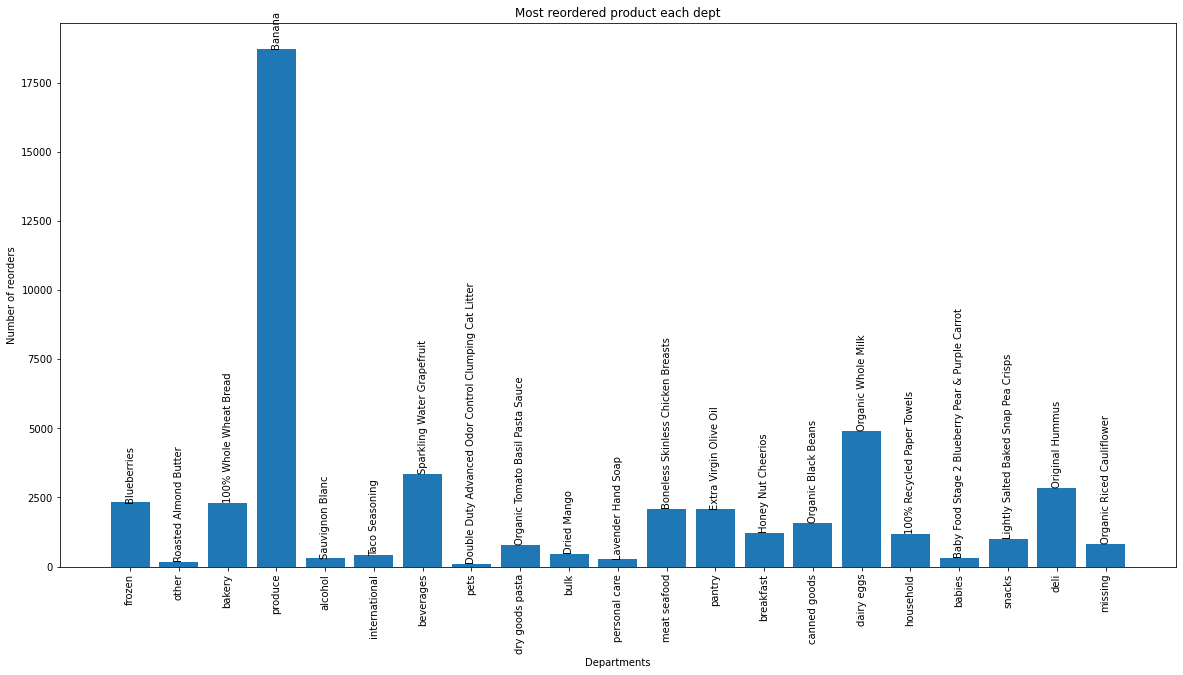

In [ ]:
plt.figure(figsize=(20,10))
bar=plt.bar(dept,count)
i=0
for rect in bar:
  height=rect.get_height()
  plt.text(rect.get_x()+rect.get_width()/2.0,height,product[i],ha='center',va='bottom',rotation=90)
  i+=1
plt.title('Most reordered product each dept')
plt.xlabel('Departments')
plt.xticks(rotation='vertical')
plt.ylabel('Number of reorders')
plt.show()

**OBS-**

*   **LIKE PRIOR**,Banana  is the product that reordered most from produce dept in train also.
*   Followed by Organic whole milk from dairy eggs dept



**XXX. Which aisle had maximum reordered?**

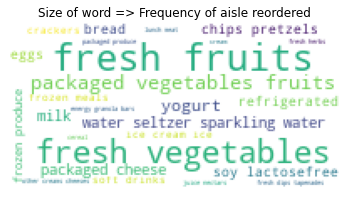

In [ ]:
#dict of aisles :number of times reordered
from wordcloud import wordcloud
dct=combine_train.groupby('aisle')['reordered'].sum().to_dict()
#wordcloud
cloud=wordcloud.WordCloud(background_color='white',width=200,height=100).generate_from_frequencies(dct)
plt.imshow(cloud)
plt.axis('off')
plt.title('Size of word => Frequency of aisle reordered')
plt.show()

**OBS-**


*   **LIKE PRIOR**,Fresh vegetables and fresh fruits were most reordered in train also.
*   other important reordered aisles are packaged vegetables fruits, yoghurt.



**XXXI. What were the most reordered products from most reordered aisles(Fresh fruits,fresh vegetables,packaged vegetables fruits, yoghurt)**

In [ ]:
ash=combine_train[(combine_train['aisle']=='fresh fruits')| (combine_train.aisle=='fresh vegetables') |(combine_train.aisle=='packaged vegetables fruits') | (combine_train.aisle=='yoghurt')]
ash=ash.groupby(['aisle','product_name'])['reordered'].sum().reset_index().sort_values(by=['reordered'],ascending=False).head(50)

Text(0, 0.5, 'Cart_position')

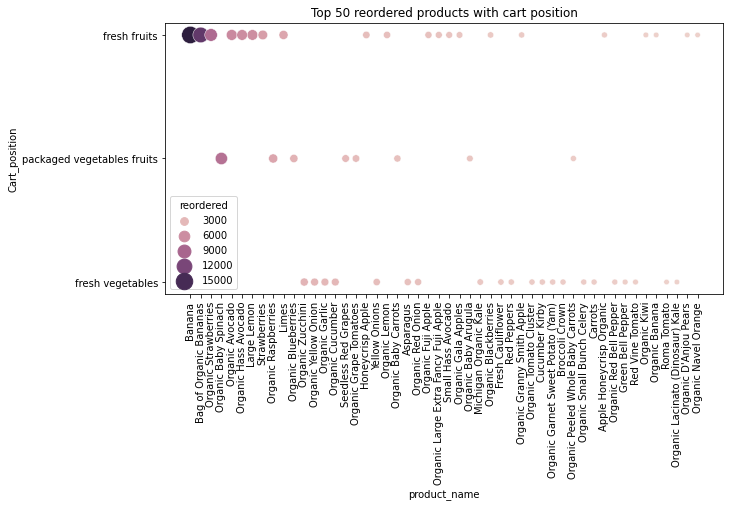

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',size='reordered',y='aisle',data=ash,hue='reordered',sizes=(30,300))

plt.xticks(rotation='vertical')
plt.title('Top 50 reordered products with cart position')
plt.ylabel('Cart_position')

**OBS-**




> Same as prior in train also,




*   Most reordered fresh fruits,Banana and organic fruits. 
*   top 2 most reordered products from are organic baby spinach and organic Rasberries.


*   important fresh vegetables includes organic products like yellow onion, garlic,Zucchini.





**XXXII. Which day of week had maximum number of reorder placed?**

Text(0.5, 1.0, 'Day wise %ge of reordered placed')

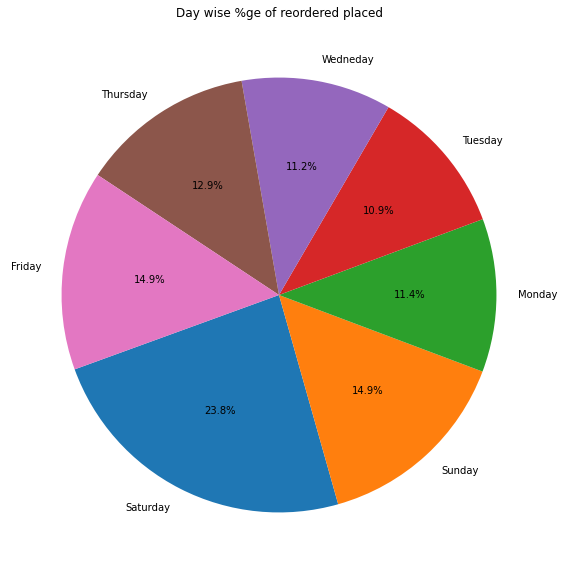

In [ ]:
dow_re_sum=combine_train.groupby(['order_dow'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(10,10))
labels=['Saturday','Sunday','Monday','Tuesday','Wedneday','Thursday','Friday']
sizes=(np.array((dow_re_sum['Total reorders']/dow_re_sum['Total reorders'].sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Day wise %ge of reordered placed')

**OBS-**

*  **like prior**,Maximum number of reorders placed at Saturday followed by Sunday,followed by Friday.
*  But Thursday and Wednesday had more  number of reorders than Monday.

*  There is no day of week on which number of reorders placed was <11%.



**XXXIII. top products that reordered only on weekends**

In [62]:
filter1=combine_train[(combine_train.reordered==1)& (combine_train['order_dow']<=1)]
filter2=combine_train[(combine_train.reordered==1)&(combine_train['order_dow']>1)]
prd=list(set(filter1['product_name'])-set(filter2['product_name']))  #reordered only on weekends
flt=filter1[filter1['product_name'].isin(prd)].groupby('product_name')['reordered'].sum().reset_index().sort_values(by='reordered',ascending=False).head(10)

Text(0, 0.5, 'Number of reorders')

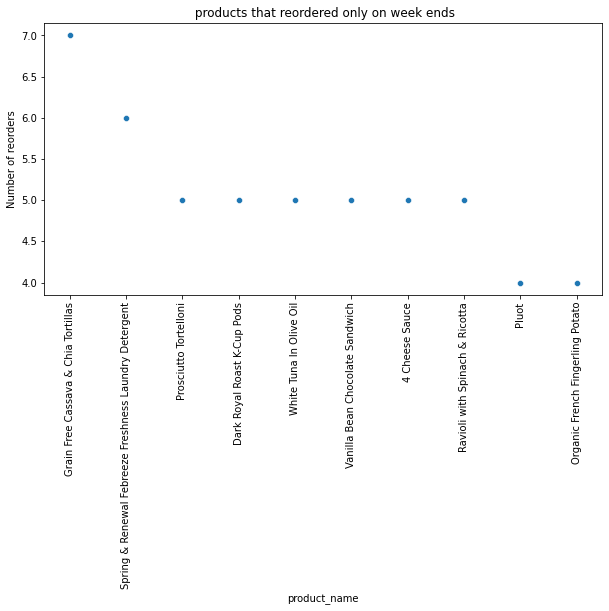

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='product_name',y='reordered',data=flt)
plt.xticks(rotation='vertical')
plt.title(' products that reordered only on week ends')
plt.ylabel('Number of reorders')

**OBS-**


*   **like prior,**We have very few products that reordered only on weekends and amount of reordering is also very low(<=9)




**XXXIV. What hour of day had most reordered placed?**

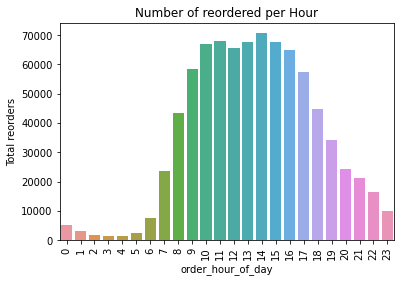

In [ ]:
hour_re_sum=combine_train.groupby(['order_hour_of_day'])['reordered'].sum().reset_index(name='Total reorders')
sns.barplot(x='order_hour_of_day',y='Total reorders',data=hour_re_sum)
plt.xticks(rotation='vertical')
plt.title('Number of reordered per Hour')
plt.show()

**OBS-**

 

*   9am to 4 pm is the most favorite hours for reordering, **like prior**
*   least amount of reordered placed at 3am(<0.5%),**like prior**


*  1am to 5am is the least utilized hours for reordering,**like prior**


*   **But**, the most utilised hour for reordering is 2pm and 3pm in train and not 10 am.














**XXXV. Did products ADD-TO-CART sequence order has any impact on reordering of products?**

Text(0.5, 1.0, 'Add-to-cart order VS Total Number of Reorders')

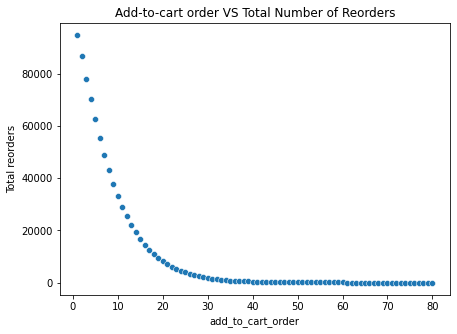

In [67]:
cart_re_sum=combine_train.groupby(['add_to_cart_order'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(7,5))
sns.scatterplot(x='add_to_cart_order',y='Total reorders',data=cart_re_sum)
plt.title('Add-to-cart order VS Total Number of Reorders')

**OBS-**

**Same as prior, in train also**
* Maximum reorder happened for products that added at position 1 in cart.
*  Products add to cart order is directly proportional to Total number of reorders.


*   If a product was added after 30 in cart, No reorder will going to happen fo r such products.





**XXXVI. Did days_since_prior_order has any impact on reordering?**

Text(0.5, 1.0, 'days_since_prior_order VS Total Number of Reorders')

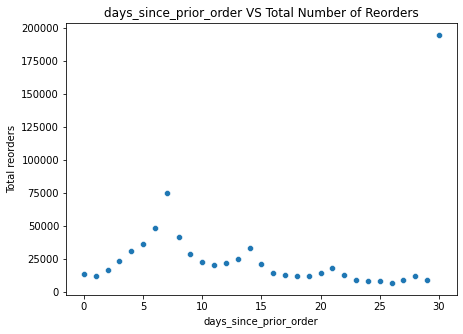

In [68]:
pr_days_re_sum=combine_train.groupby(['days_since_prior_order'])['reordered'].sum().reset_index(name='Total reorders')
plt.figure(figsize=(7,5))
sns.scatterplot(x='days_since_prior_order',y='Total reorders',data=pr_days_re_sum)
plt.title('days_since_prior_order VS Total Number of Reorders')

**OBS-**

* **LIKE PRIOR**,orders placed after 30 and 7 days has higher chance of reordering.
* **BUT**, here 30 days has more chance and not in 7 days 







**XXXVII. Which day and which hour of that day is most favorite for reordering products?**

In [70]:
day_hr_re_sum=combine_train.groupby(['order_dow','order_hour_of_day'])['reordered'].sum().reset_index()
day_hr_re_sum=day_hr_re_sum.pivot('order_dow','order_hour_of_day','reordered')

Text(0.5, 1.0, 'Number of reorders per hour per day')

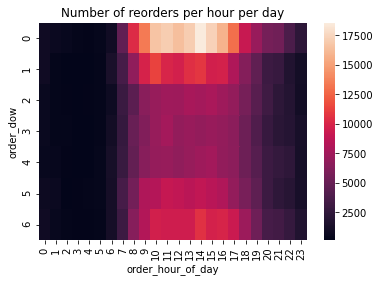

In [71]:
sns.heatmap(day_hr_re_sum)
plt.title('Number of reorders per hour per day')

**OBS-**


*   Like prior, Saturday 12-2 pm is most fav hour of reordering in train.



**test data set analysis**

In [22]:
test=orders[orders.eval_set=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0




> For test eval set data we have only this much info available.There is  no reorder column.We have only user_id and order_id and somee info about when order placed.



**XXXVIII. Number of orders per day of week in test data**

Text(0.5, 1.0, 'Numbers of orders per day in test data')

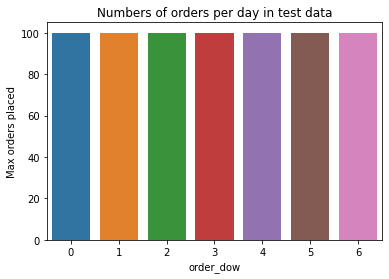

In [48]:
te=test.groupby('order_dow')['order_number'].max().reset_index()
sns.barplot(x='order_dow',y='order_number',data=te)
plt.ylabel('Max orders placed')
plt.title('Numbers of orders per day in test data')

**OBS-**


*   We have almost same number of orders in test each day =100.


**XXXIX. Number of orders per hour_of_day in test data**

Text(0.5, 1.0, 'Numbers of orders per hour in test data')

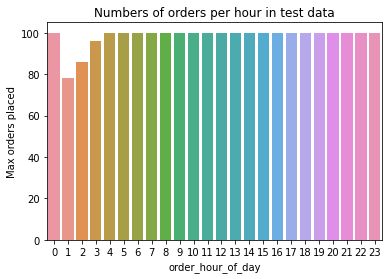

In [49]:
te=test.groupby('order_hour_of_day')['order_number'].max().reset_index()
sns.barplot(x='order_hour_of_day',y='order_number',data=te)
plt.ylabel('Max orders placed')
plt.title('Numbers of orders per hour in test data')

**OBS-**


*   We have around 80-100 orders each hour in test data set.



**XXXX. Day of week reorder ratio for both prior and train**

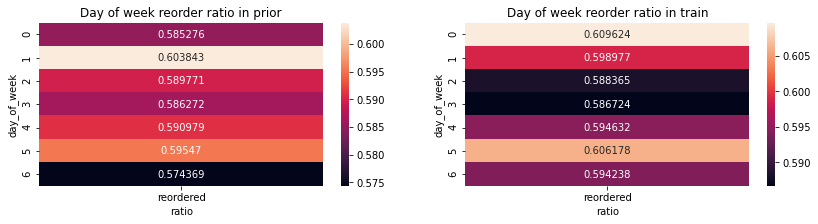

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,3))

filter1=combine_prior.groupby('order_dow')['reordered'].mean().reset_index()
df=pd.DataFrame({'reordered':filter1.reordered},index=filter1.order_dow)
sns.heatmap(df,annot=True,fmt='g',ax=ax1)

filter2=combine_train.groupby('order_dow')['reordered'].mean().reset_index()
df=pd.DataFrame({'reordered':filter2.reordered},index=filter2.order_dow)
sns.heatmap(df,annot=True,fmt='g',ax=ax2)

ax1.set_title('Day of week reorder ratio in prior')
ax1.set_ylabel('day_of_week')
ax1.set_xlabel('ratio')
ax2.set_title('Day of week reorder ratio in train')
ax2.set_ylabel('day_of_week')
ax2.set_xlabel('ratio')
plt.show()

**OBS-**


*   We have almost same reorder ratio for prior and train data each day,differ only with <=0.02.


*  Most reorders placed on weekends each set.




<h2> FINAL CONCLUSIONS:</h2>


1. Total number of reorders per user range from 0-500, with 50 was most expected number of times  users placed reorder. 

2. Bananas was the most reordered product.
 
3. Produce department had max products that were reordered, followed by dairy eggs.

4. Bulk department had least products that were reordered.

5. Weekends had highest reordering of products.
6. Friday also has significant number of reordered, but less than weekends.

7. Between 9am to 4 pm, number of reordered placed is highest.
8. Between 1 am to 5am,very less products reordered.
8. At 3am least number of reorders happened.

9. Highest reorder was placed at Saturday(12-2pm).

10. Products that are added to cart at earlier position had highest chance of reordering.



11. Products mostly reordered after a week(7 days) and after a month(30 days) from previous purchase of it.

12.  Fresh fruits and fresh vegetables were most reordered .
13.  organic products were also reordered in significant amount.










